# Task L8

**Description**: Brest cancer dataset, DecisionTree, RandomForest, GBDT, XGBoost

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

### 1. Load the breast cancer dataset

In [3]:
cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
print('labels:', labels)
print('features:', features)

labels: ['malignant' 'benign']
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 2. Splitting data into training and test samples

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### 3. Creating and training a decision tree model

In [5]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Derivation of accuracy
print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))

# Visualization of the decision tree
graph_viz = tree.export_graphviz(clf, out_file=None,
                                 feature_names=features,
                                 class_names=labels,
                                 filled=True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup=True)

train accuracy= 100.000%
test accuracy= 88.112%


'Source.gv.pdf'

![alt text](image.png)

### 4. Creating and training a random forest model

In [6]:
from sklearn.ensemble import RandomForestClassifier


In [7]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Derivation of accuracy
print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))

train accuracy= 100.000%
test accuracy= 97.203%


### 5. Creating and training a Gradient Boosting model

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

# Derivation of accuracy
print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))


train accuracy= 100.000%
test accuracy= 96.503%


### 6. Creating and training an XGBoost model

In [10]:
from xgboost import XGBClassifier

In [11]:
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
clf.fit(X_train, y_train)

# Derivation of accuracy
print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))

train accuracy= 100.000%
test accuracy= 97.203%


C:\Users\userk\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

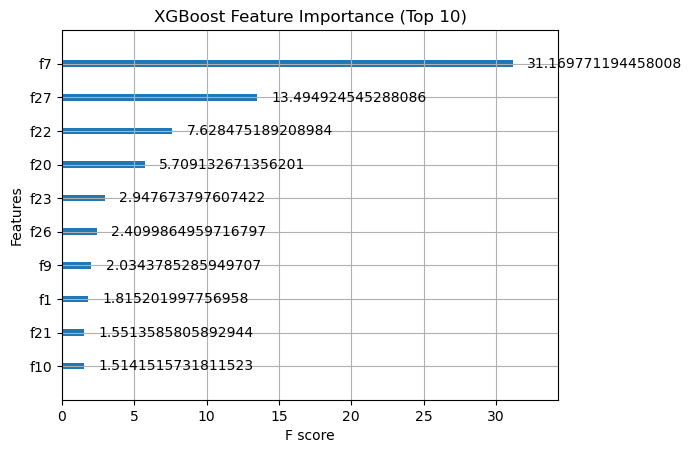

In [13]:
# Visualization of feature importance
plot_importance(clf, max_num_features=10, importance_type='gain')
plt.title("XGBoost Feature Importance (Top 10)")
plt.show()